<a href="https://colab.research.google.com/github/Jay-prakashpandey/Spark-foundation-project/blob/main/predict_the_score_of_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SPARKS FOUNDATION
*Task-01*
**Prediction using Supervised ML (Level - Beginner)**

BY: Jay Prakash Pandey
#Data Science and Business Analytics Intern
In this task we have to pridict the percentage of a student based on the no. of hours.



*   This is a simple linear regression task as it involves just 2 variables.
*   Data can be found at http://bit.ly/w-data
*   Problem: What will be predicted score if a student studies for 9.25 hrs/ day?

In [3]:
# Importing all libraries required in this notebook
import pandas as pd #Pandas for Reading and visualising the data
import numpy as np  #Numpy to deal with array , matrix and there operations
import matplotlib.pyplot as plt  # to graphically visualise
# to plot figure in same window
%matplotlib inline 

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(15) #To visualise the data ploted

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **To find the dimension of data**

In [5]:
data.shape

(25, 2)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

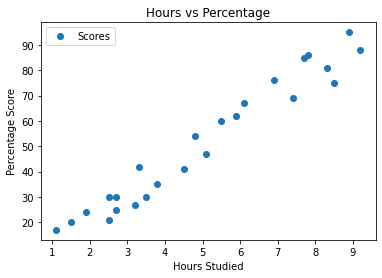

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [7]:
data.isnull().sum()
#is any missing value

Hours     0
Scores    0
dtype: int64

### **Preparing the data**
Splitting data in dependent and independent Variables

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = data.iloc[:, :-1].values  #indepedent variable
y = data.iloc[:, 1].values    #Dependent variable
print(X)
size=y.size
print("No of data is",size)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
No of data is 25


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
# splited 20% of data as test data and rest for train with no random

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


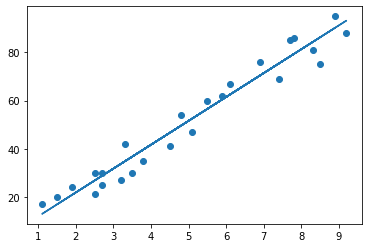

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


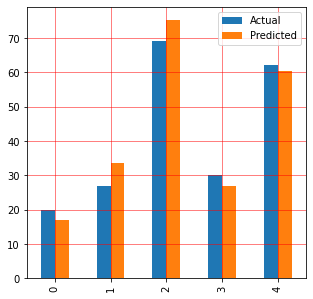

In [15]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='green')
plt.show()

#Modal Evaluation
**In this we evaluate the our best fitted output and percetage error in our model** 

In [ ]:
#coefficent and intercept of our  model
print("Coefficients:\n",regressor.coef_)
print("Intercept:\n",regressor.intercept_)

Coefficients:
 [9.91065648]
Intercept:
 2.018160041434662


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [ ]:
# Variance Score
from sklearn.metrics import r2_score
print("Varience Score: %0.2f" %r2_score(y_test,y_pred))

Varience Score: 0.95


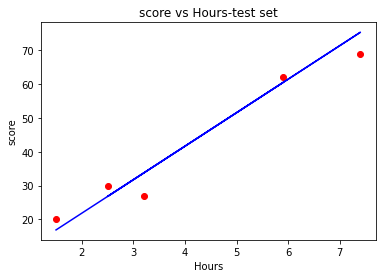

In [ ]:
#Ploting graph for test data
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_test, y_pred, color='blue')
plt.title('score vs Hours-test set')
plt.ylabel("score")
plt.xlabel('Hours')
plt.show()

In [ ]:
# Our model is ready lets testfor given problem
time= [[9.25]]
own = regressor.predict(time)
print("no of hours ={}".format(time))
print("pridicted score is: {}".format(own[0]))

no of hours =[[9.25]]
pridicted score is: 93.69173248737539


Our model gives output as students will score 93.6917 , if she studies 9.25 hours/day